## Apartment _Resale_Prediction

#### Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm

In [2]:
df = pd.read_csv('Apartment_Resale_Price.csv')

In [4]:
df.head()

,Date,City,Locality,Sublocality,Floor,Floor_Area,Apartment_Class,Apartment_Type,Age_Left,Resale_Price
0,2017-01,city_1,locality_009,406,10 TO 12,474.0,Enhanced,2 BHK,61 years 04 months,3483000.0
1,2017-01,city_1,locality_004,108,01 TO 03,721.0,New Gen,3 BHK,60 years 07 months,3754000.0
2,2017-01,city_1,locality_005,602,01 TO 03,721.0,New Gen,3 BHK,62 years 05 months,3934000.0
3,2017-01,city_1,locality_009,465,04 TO 06,732.0,New Gen,3 BHK,62 years 01 month,3979000.0
4,2017-01,city_1,locality_005,601,01 TO 03,721.0,New Gen,3 BHK,62 years 05 months,3979000.0


###### Information about dataset

In [5]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75401 entries, 0 to 75400
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date             75401 non-null  object 
 1   City             75401 non-null  object 
 2   Locality         75401 non-null  object 
 3   Sublocality      75401 non-null  object 
 4   Floor            75401 non-null  object 
 5   Floor_Area       75401 non-null  float64
 6   Apartment_Class  75401 non-null  object 
 7   Apartment_Type   75401 non-null  object 
 8   Age_Left         75401 non-null  object 
 9   Resale_Price     75401 non-null  float64
dtypes: float64(2), object(8)
memory usage: 5.8+ MB


###### Five point summary 

In [6]:
df.describe(include='all').T 

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Date,75401,41,2021-01,2497,NaN,NaN,NaN,NaN,NaN,NaN,NaN
City,75401,26,city_21,6312,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Locality,75401,551,locality_540,1110,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sublocality,75401,2500,2,250,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Floor,75401,17,04 TO 06,17574,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Floor_Area,75401.0,NaN,NaN,NaN,1050.410193,260.524093,334.0,883.0,1012.0,1216.0,2680.0
Apartment_Class,75401,20,Category A,24852,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Apartment_Type,75401,7,4 BHK,31390,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age_Left,75401,635,94 years 09 months,687,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Resale_Price,75401.0,NaN,NaN,NaN,6024195.183088,2926049.584343,0.0,4580000.0,5976000.0,7538000.0,18891000.0


###### Checking for null values

In [7]:
df.isnull().sum()

Date               0
City               0
Locality           0
Sublocality        0
Floor              0
Floor_Area         0
Apartment_Class    0
Apartment_Type     0
Age_Left           0
Resale_Price       0
dtype: int64

###### Spliting into train and test

In [8]:
train = df[df['Resale_Price']!=0]
test = df[df['Resale_Price'] ==0]

###### Numerical and Categorical Columns

In [9]:
num_col = train.select_dtypes(np.number)
cat_col = train.select_dtypes(object)

###### Checking for outliers

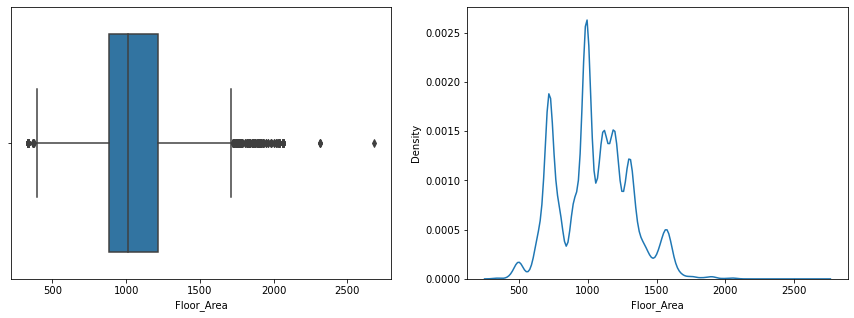

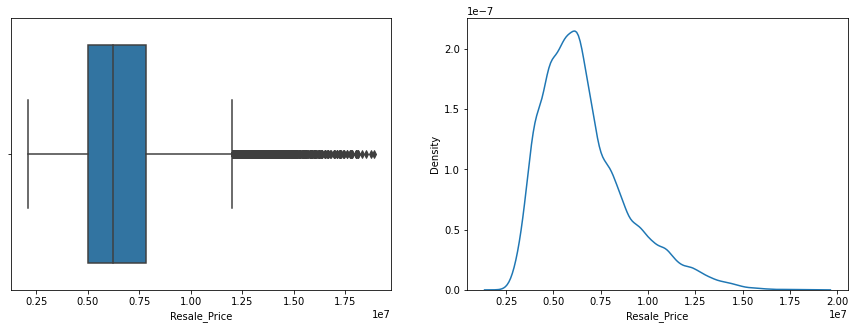

In [10]:
for i in num_col:
    fig,ax = plt.subplots(1,2, figsize=(15,5))
    sns.boxplot(train[i],ax=ax[0])
    sns.kdeplot(train[i],ax=ax[1])
    plt.show()

###### Univariate analysis

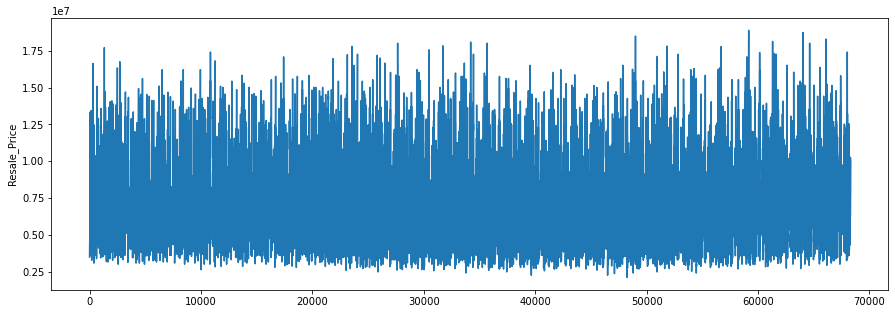

In [11]:
plt.figure(figsize=(15,5))
sns.lineplot(data = train['Resale_Price'])
plt.show()

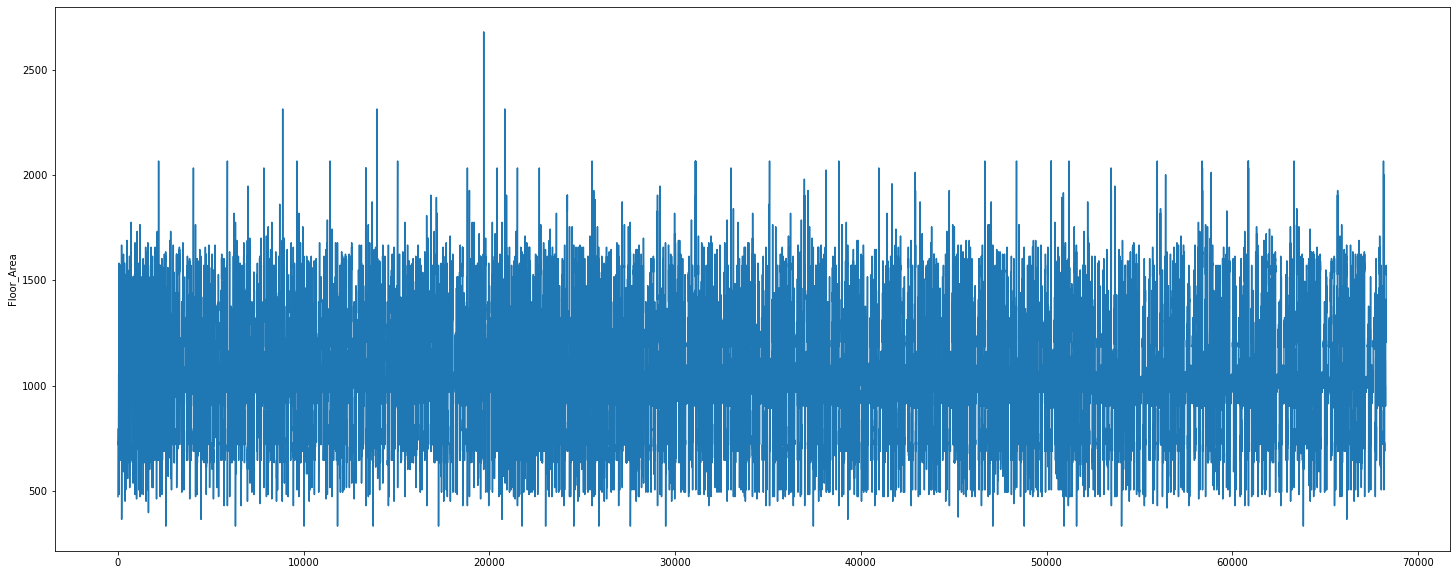

In [12]:
plt.figure(figsize=(25,10))
sns.lineplot(data = train['Floor_Area'])
plt.show()

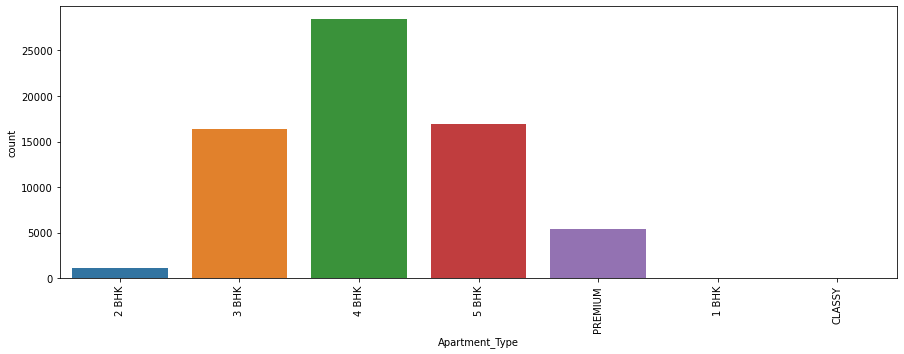

In [13]:
plt.figure(figsize=(15,5))
sns.countplot(train['Apartment_Type'])
plt.xticks(rotation=90)
plt.show()

In [14]:
cat_col.columns

Index(['Date', 'City', 'Locality', 'Sublocality', 'Floor', 'Apartment_Class',
       'Apartment_Type', 'Age_Left'],
      dtype='object')

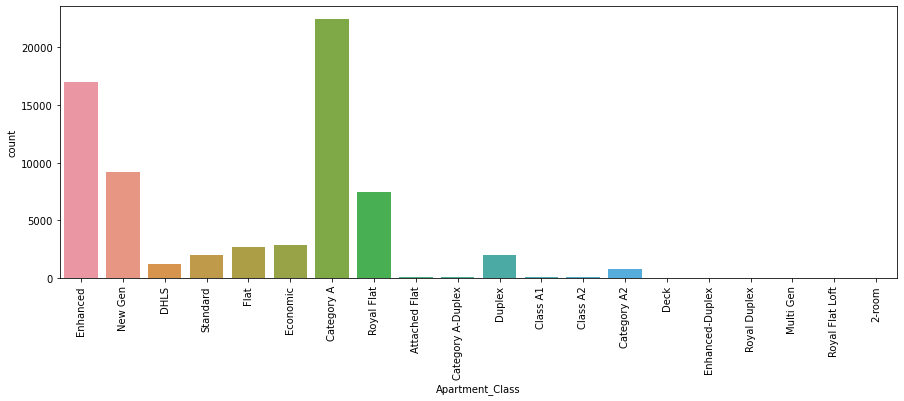

In [15]:
plt.figure(figsize=(15,5))
sns.countplot(train['Apartment_Class'])
plt.xticks(rotation=90)
plt.show()

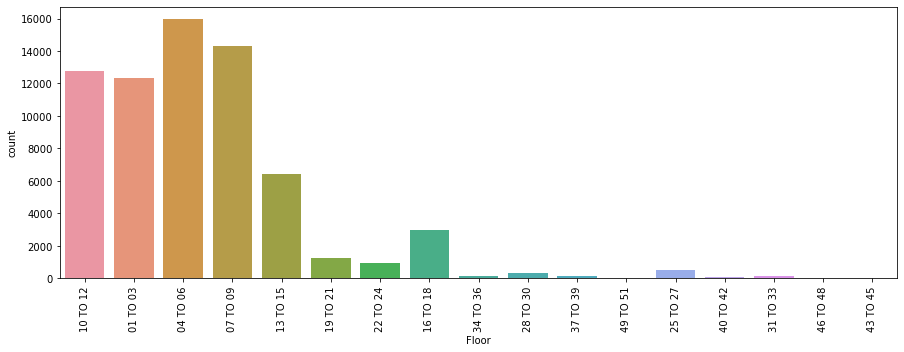

In [16]:
plt.figure(figsize=(15,5))
sns.countplot(train['Floor'])
plt.xticks(rotation=90)
plt.show()

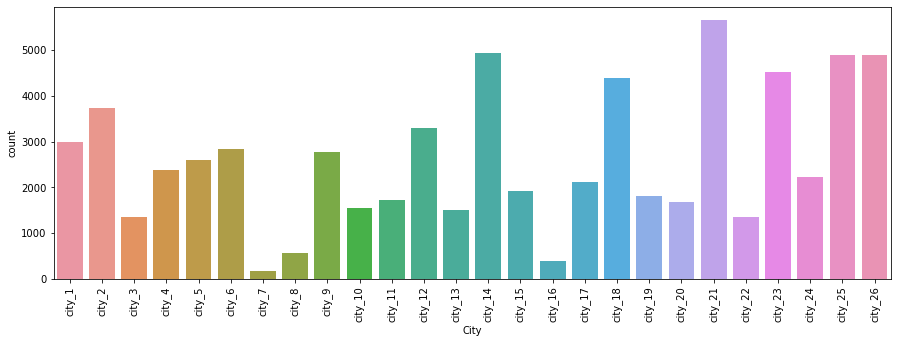

In [17]:
plt.figure(figsize=(15,5))
sns.countplot(train['City'])
plt.xticks(rotation=90)
plt.show()

##### Bivariate Analysis




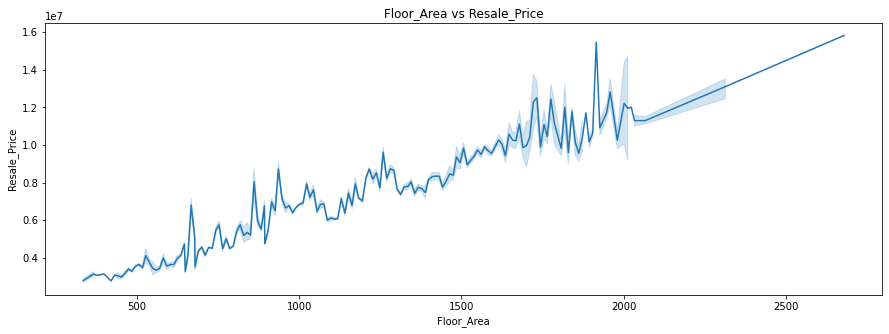

In [18]:
plt.figure(figsize=(15,5))
sns.lineplot(train['Floor_Area'],train['Resale_Price'])
plt.title("Floor_Area vs Resale_Price")
plt.show()

In [19]:
cat = cat_col.drop(['Date','Locality','Sublocality','Age_Left'],axis=1)

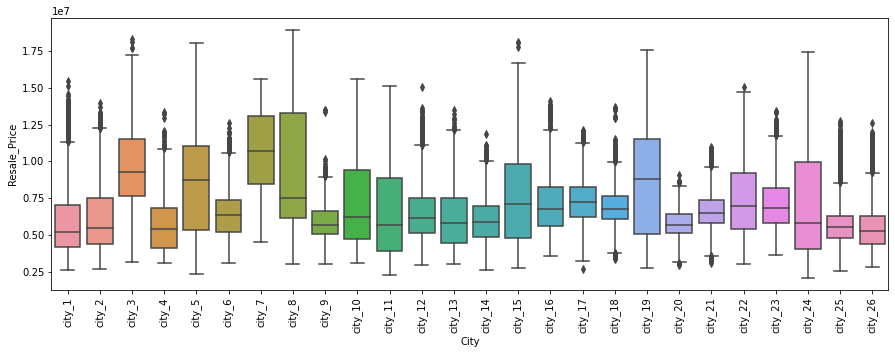

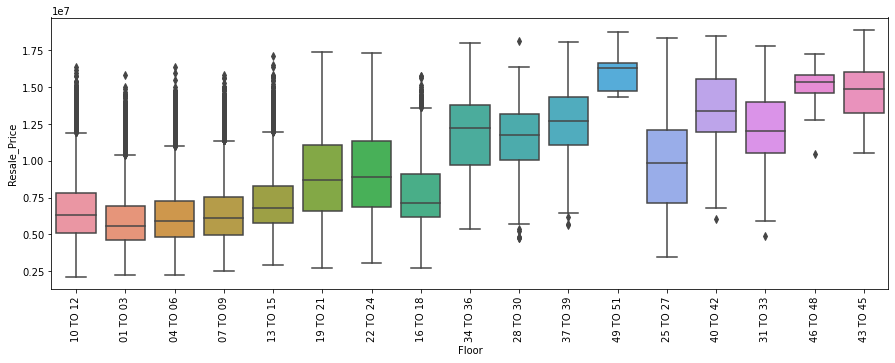

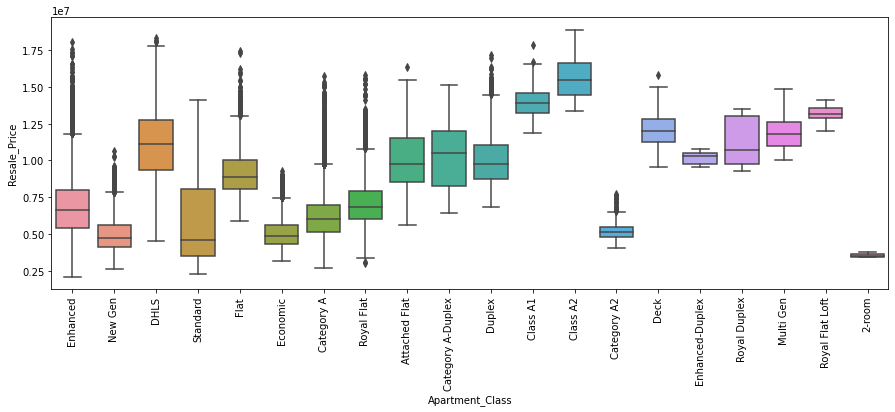

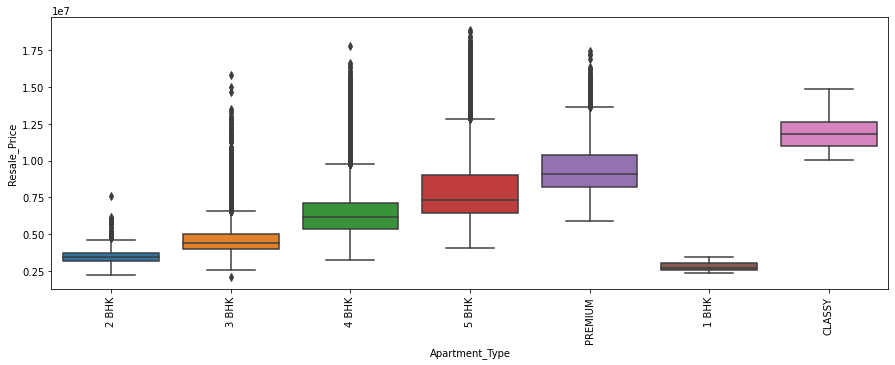

In [20]:
for i in cat:
    plt.figure(figsize=(15,5))
    sns.boxplot(train[i],train['Resale_Price'])
    plt.xticks(rotation=90)
    plt.show()

##### Mulivariate Analysis

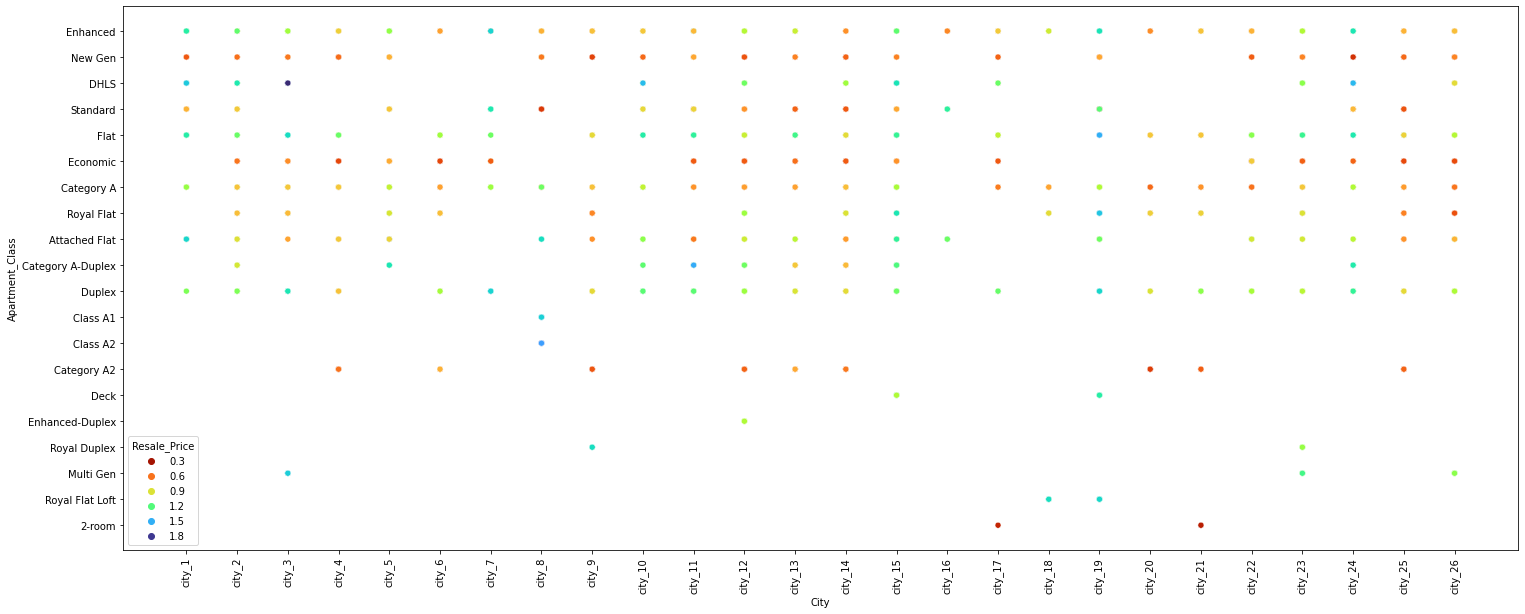

In [21]:
plt.figure(figsize=(25,10))
sns.scatterplot(train['City'],train['Apartment_Class'],hue=train['Resale_Price'],palette='turbo_r')
plt.xticks(rotation=90)
plt.show()

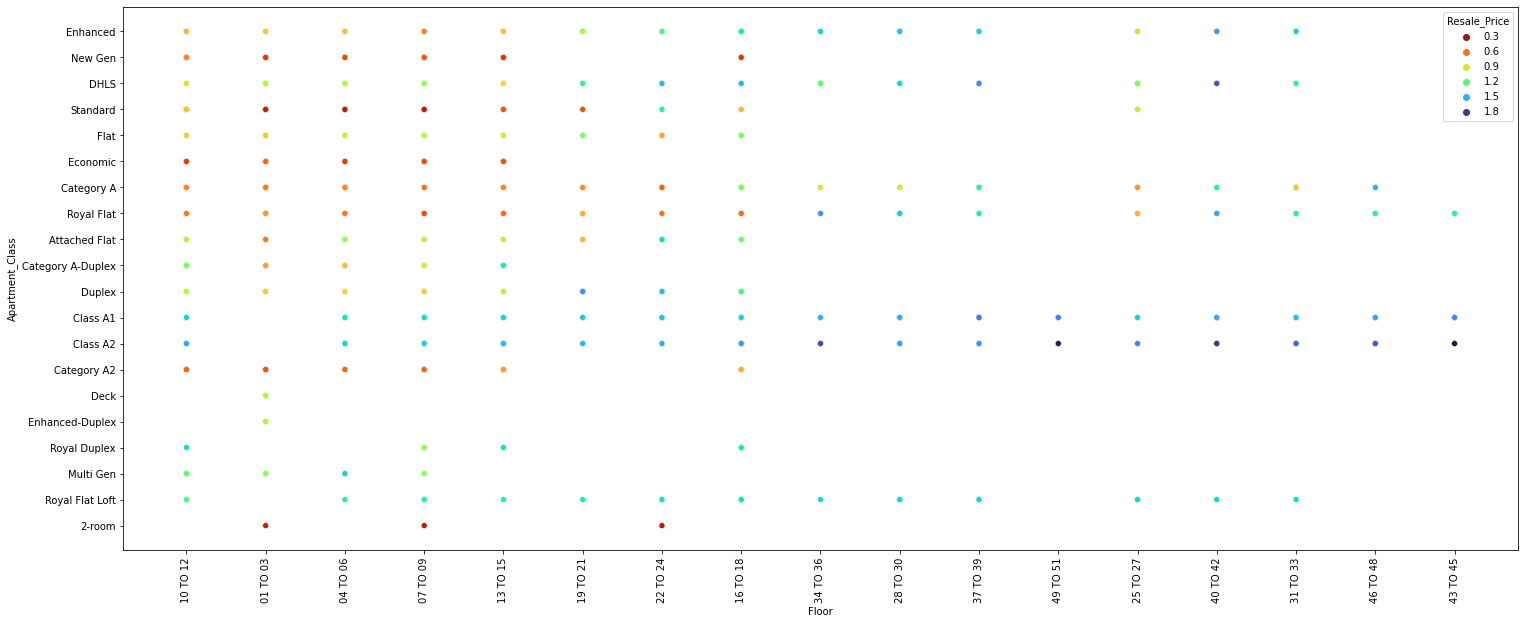

In [22]:
plt.figure(figsize=(25,10))
sns.scatterplot(train['Floor'],train['Apartment_Class'],hue=train['Resale_Price'],palette='turbo_r')
plt.xticks(rotation=90)
plt.show()

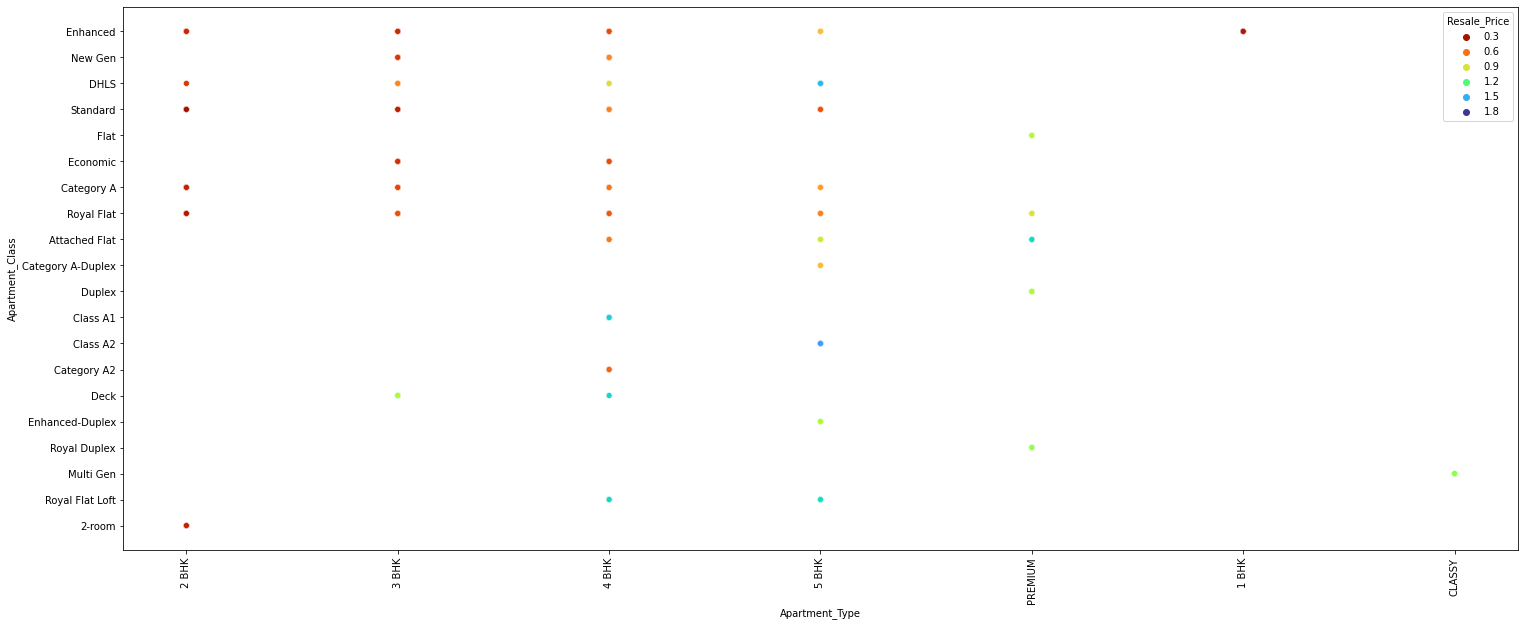

In [23]:
plt.figure(figsize=(25,10))
sns.scatterplot(train['Apartment_Type'],train['Apartment_Class'],hue=train['Resale_Price'],palette='turbo_r')
plt.xticks(rotation=90)
plt.show()

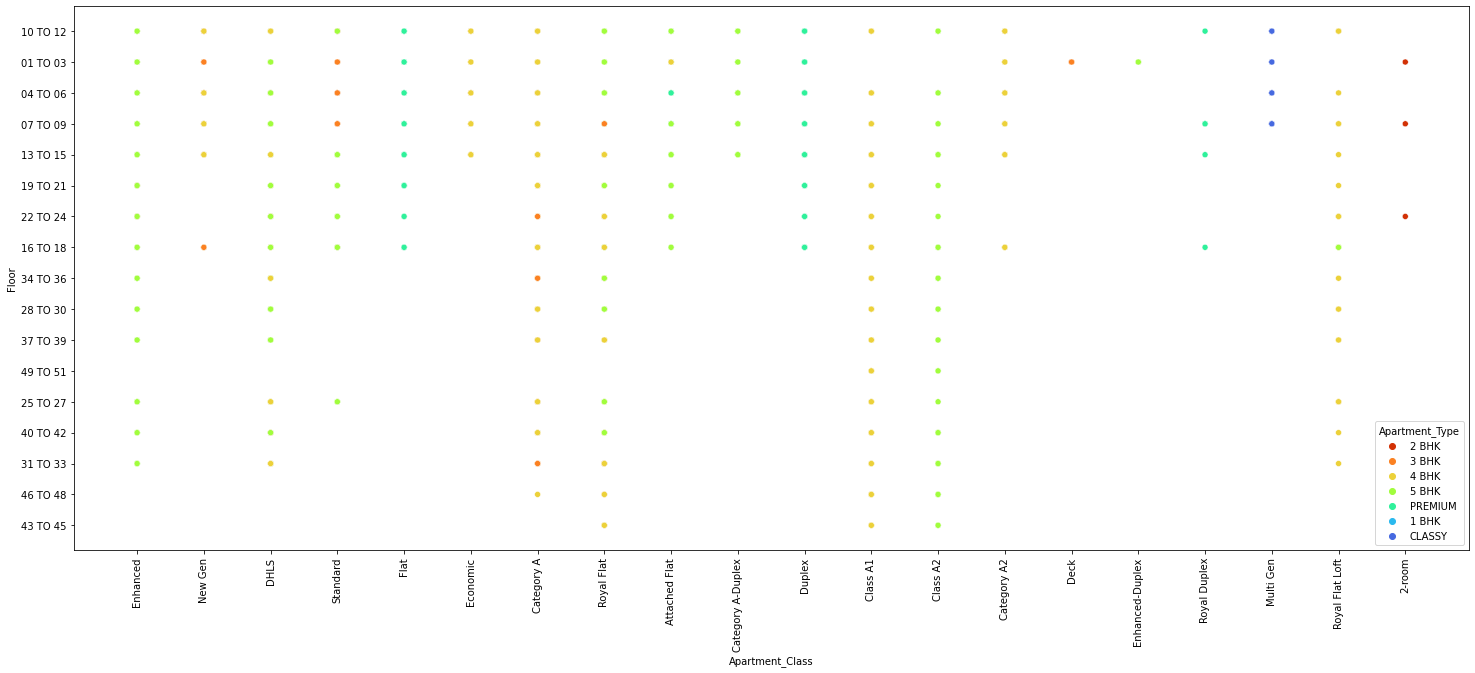

In [24]:
plt.figure(figsize=(25,10))
sns.scatterplot(train['Apartment_Class'],train['Floor'],hue=train['Apartment_Type'],palette='turbo_r')
plt.xticks(rotation=90)
plt.show()

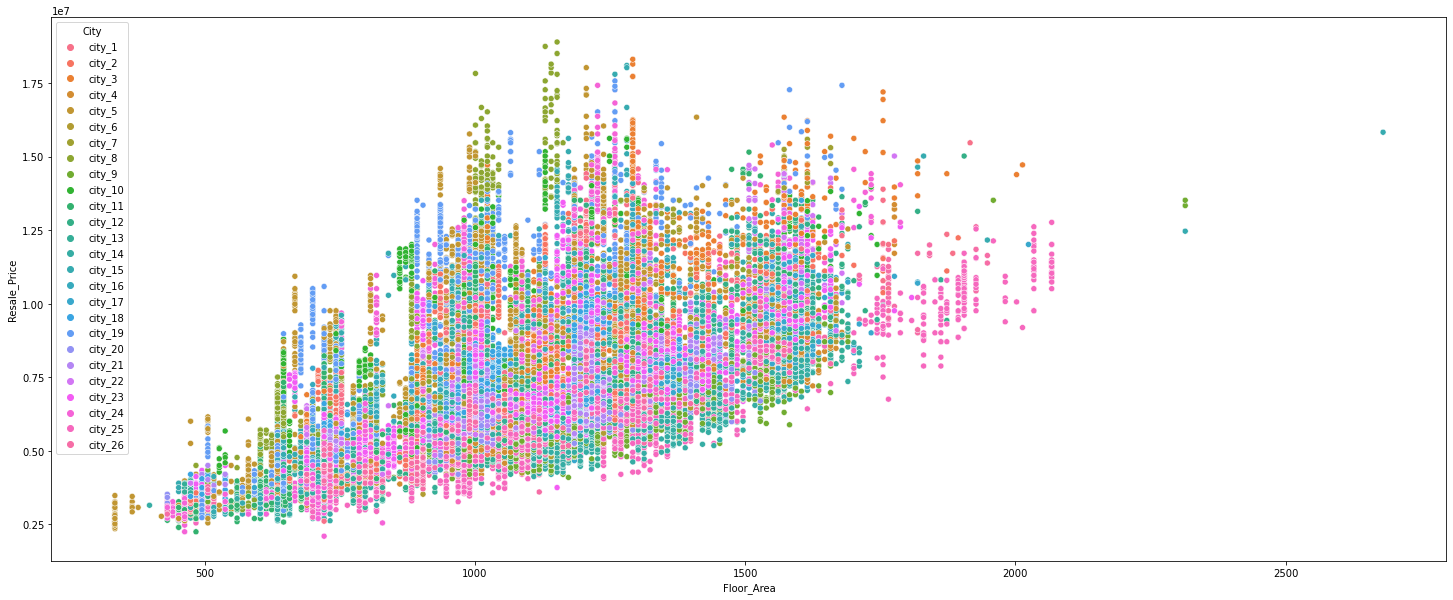

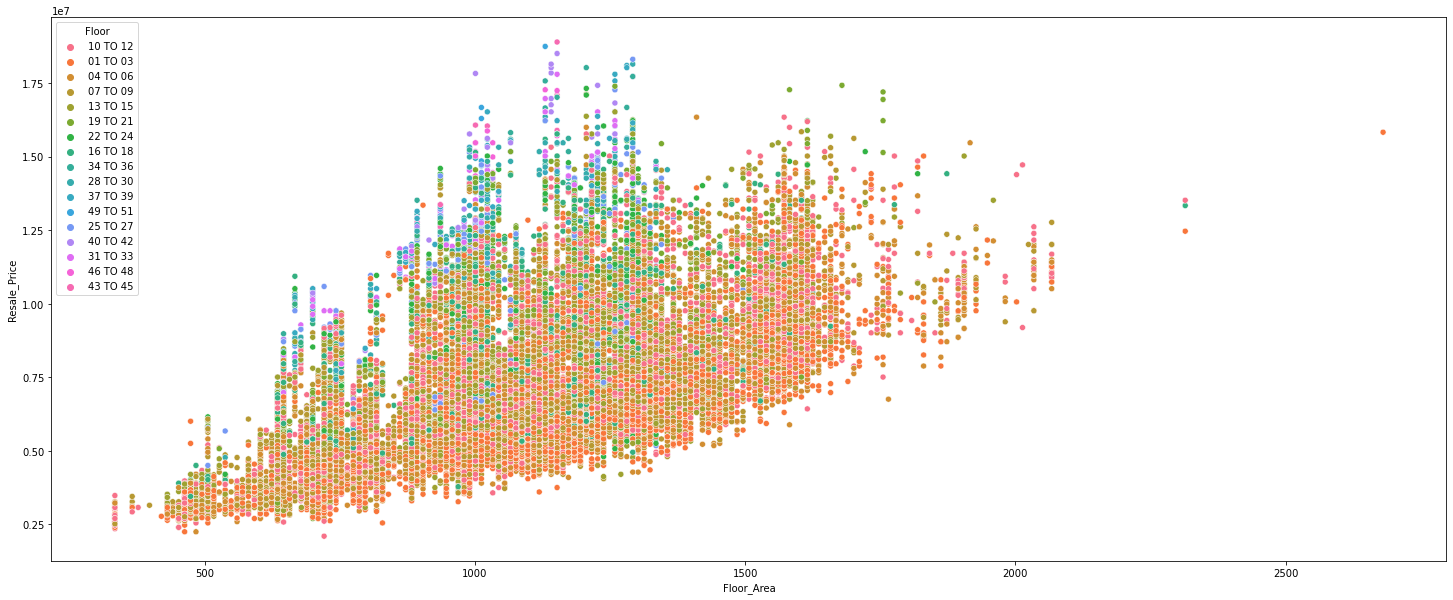

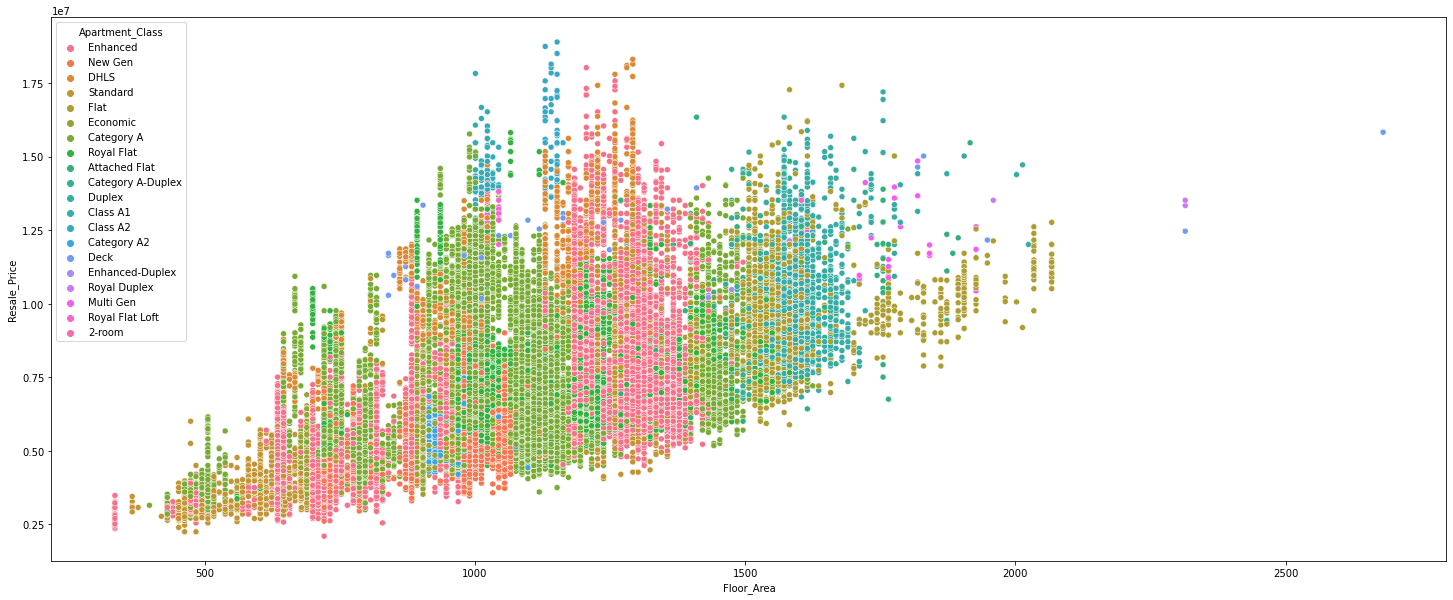

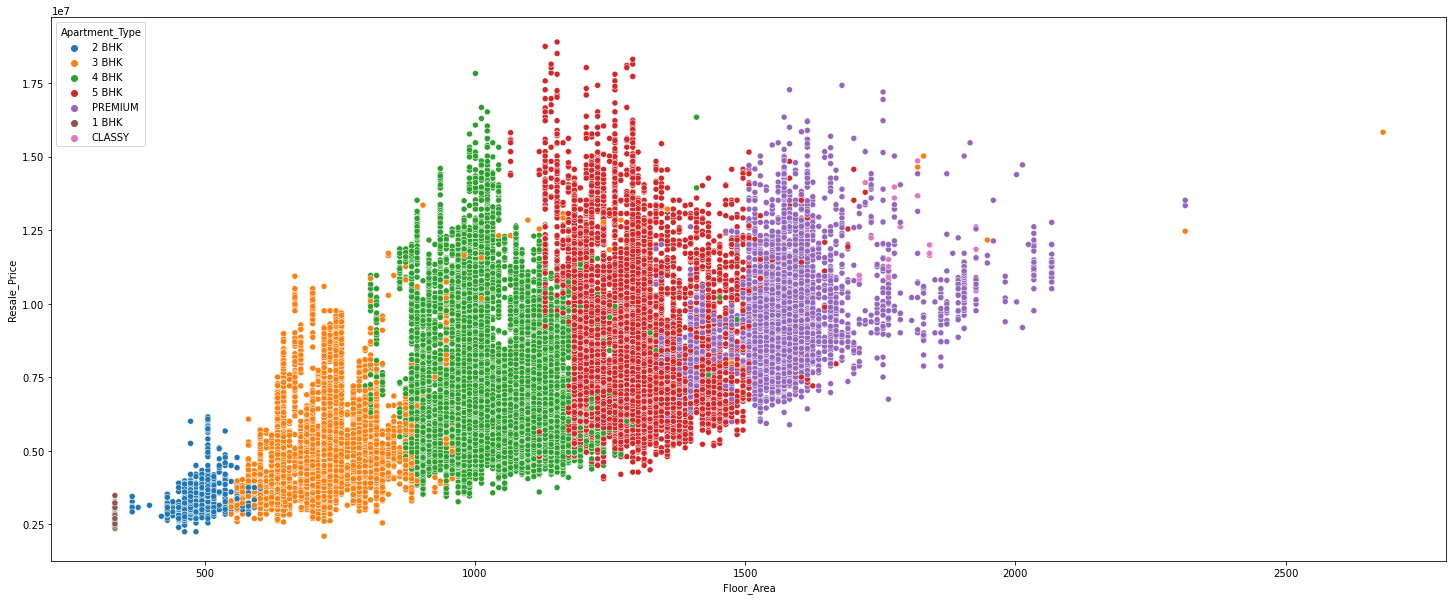

In [25]:
for i in cat:
    plt.figure(figsize=(25,10))
    sns.scatterplot('Floor_Area','Resale_Price',data=train,hue=i)
    plt.show()

##### Feature Engineering

In [26]:
df['Age_Left_Days']=df['Age_Left'].str.split(' ').apply(lambda x: x[0:3:2])
df['Age_Left_Days'] = df['Age_Left_Days'].apply(lambda x: int(x[0])*365+int(x[1])*30.43 if len(x)>1 else int(x[0])*365)

In [27]:
df['Year'] = df['Date'].apply(lambda x: x[:4])

In [28]:
df['Month'] = df['Date'].apply(lambda x: x[5:])

In [29]:
df.drop('Date',axis=1,inplace=True)

In [30]:
df['Year'] = df['Year'].astype(int)
df['Month'] = df['Month'].astype(int)


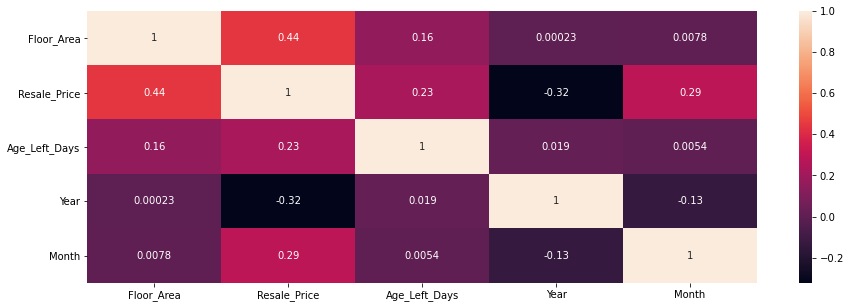

In [31]:
plt.figure(figsize=(15,5))
sns.heatmap(df.corr(),annot=True)
plt.show()

##### Statistical Inference

In [32]:
df.drop(['Age_Left','Sublocality','Locality'],axis=1,inplace=True)

In [33]:
dum = pd.get_dummies(df,drop_first=True)

In [34]:
dum.head()

,Floor_Area,Resale_Price,Age_Left_Days,Year,Month,City_city_10,City_city_11,City_city_12,City_city_13,City_city_14,...,Apartment_Class_Royal Duplex,Apartment_Class_Royal Flat,Apartment_Class_Royal Flat Loft,Apartment_Class_Standard,Apartment_Type_2 BHK,Apartment_Type_3 BHK,Apartment_Type_4 BHK,Apartment_Type_5 BHK,Apartment_Type_CLASSY,Apartment_Type_PREMIUM
0,474.0,3483000.0,22386.72,2017,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,721.0,3754000.0,22113.01,2017,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,721.0,3934000.0,22782.15,2017,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,732.0,3979000.0,22660.43,2017,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,721.0,3979000.0,22782.15,2017,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [35]:
dum_train = dum[dum['Resale_Price']!=0]
dum_test = dum[dum['Resale_Price']==0]
dum_train.shape

(68292, 71)

In [36]:
X = dum_train.drop('Resale_Price',axis=1)
y = dum_train['Resale_Price']

In [37]:
Xc = sm.add_constant(X)
model = sm.OLS(y,Xc).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Resale_Price   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                     6340.
Date:                Fri, 02 Jul 2021   Prob (F-statistic):               0.00
Time:                        11:13:30   Log-Likelihood:            -1.0288e+06
No. Observations:               68292   AIC:                         2.058e+06
Df Residuals:                   68222   BIC:                         2.058e+06
Df Model:                          69                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                             -8.221e+07   5.43e+06    -15.145      0.000   -9.29e+07   -7.16e+07
Floor_Area                         4961.4628     56.629     87.613      0.000    4850.469    5072.456
Age_Left_Days                       194.8303      1.243    156.780      0.000     192.395     197.266
Year                               3.839e+04   2674.148     14.358      0.000    3.32e+04    4.36e+04
Month                              1.437e+04    938.686     15.312      0.000    1.25e+04    1.62e+04
City_city_10                       5.731e+05   2.65e+04     21.601      0.000    5.21e+05    6.25e+05
City_city_11                       7.033e+05    2.7e+04     26.062      0.000     6.5e+05    7.56e+05
City_city_12                      -1.114e+06   2.25e+04    -49.575      0.000   -1.16e+06   -1.07e+06
City_city_13                      -9.853e+05   2.72e+04    -36.282      0.000   -1.04e+06   -9.32e+05
City_city_14                      -1.888e+06   2.13e+04    -88.535      0.000   -1.93e+06   -1.85e+06
City_city_15                       9.072e+05    2.6e+04     34.838      0.000    8.56e+05    9.58e+05
City_city_16                       2.316e+06   4.64e+04     49.898      0.000    2.23e+06    2.41e+06
City_city_17                      -1.408e+06   2.59e+04    -54.304      0.000   -1.46e+06   -1.36e+06
City_city_18                      -1.693e+06   2.36e+04    -71.798      0.000   -1.74e+06   -1.65e+06
City_city_19                       1.894e+06   2.72e+04     69.509      0.000    1.84e+06    1.95e+06
City_city_2                       -1.092e+05   2.11e+04     -5.183      0.000    -1.5e+05   -6.79e+04
City_city_20                      -2.727e+06   2.79e+04    -97.912      0.000   -2.78e+06   -2.67e+06
City_city_21                      -2.016e+06   2.21e+04    -91.419      0.000   -2.06e+06   -1.97e+06
City_city_22                       9.007e+04   2.86e+04      3.146      0.002    3.39e+04    1.46e+05
City_city_23                      -5.613e+05   2.16e+04    -26.023      0.000   -6.04e+05   -5.19e+05
City_city_24                       7.719e+05   2.53e+04     30.488      0.000    7.22e+05    8.22e+05
City_city_25                      -2.383e+06   2.15e+04   -111.043      0.000   -2.42e+06   -2.34e+06
City_city_26                      -1.678e+06    2.1e+04    -79.871      0.000   -1.72e+06   -1.64e+06
City_city_3                        1.552e+06   2.91e+04     53.292      0.000    1.49e+06    1.61e+06
City_city_4                       -1.212e+06    2.4e+04    -50.548      0.000   -1.26e+06   -1.17e+06
City_city_5                        1.739e+06   2.41e+04     72.042      0.000    1.69e+06    1.79e+06
City_city_6                       -1.902e+06   2.41e+04    -78.976      0.000   -1.95e+06   -1.85e+06
City_city_7            

In [38]:
residuals = model.resid
y_pred = model.predict(Xc)

###### Assumption 1 - - Multicollinearity

In [39]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

vf = [vif(Xc.values, i) for i in range(Xc.shape[1])]
vf1=pd.DataFrame(vf, index=Xc.columns, columns=['vif'])
vf1

,vif
const,2.821144e+06
Floor_Area,2.089293e+01
Age_Left_Days,3.403645e+00
Year,1.020697e+00
Month,1.008901e+00
...,...
Apartment_Type_3 BHK,4.172703e+02
Apartment_Type_4 BHK,5.791970e+02
Apartment_Type_5 BHK,4.731307e+02
Apartment_Type_CLASSY,inf


In [40]:
df.columns

Index(['City', 'Floor', 'Floor_Area', 'Apartment_Class', 'Apartment_Type',
       'Resale_Price', 'Age_Left_Days', 'Year', 'Month'],
      dtype='object')

In [41]:
vf1.sort_values(by='vif',ascending=False)

,vif
Apartment_Type_CLASSY,inf
Apartment_Class_Multi Gen,inf
const,2.821144e+06
Apartment_Class_Category A,5.040580e+03
Apartment_Class_Enhanced,4.279115e+03
...,...
Floor_40 TO 42,1.045442e+00
Floor_34 TO 36,1.037888e+00
Floor_43 TO 45,1.032712e+00
Year,1.020697e+00


In [42]:
vf1.loc[[ 'Age_Left_Days', 'Year', 'Month']]

,vif
Age_Left_Days,3.403645
Year,1.020697
Month,1.008901


###### Assumption 2 - - Normality of Residuals

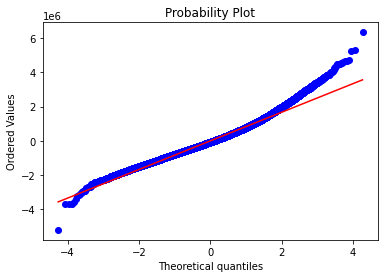

In [43]:
from scipy import stats

stats.probplot(residuals,plot=plt)
plt.show()


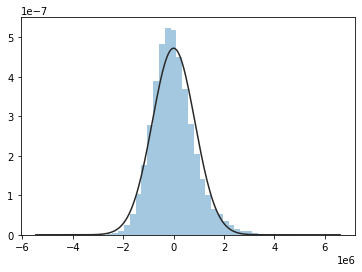

In [44]:
from scipy.stats import norm
norm.fit(residuals)
sns.distplot(residuals, fit=norm, kde=False)
plt.show()

###### Homoscedacity

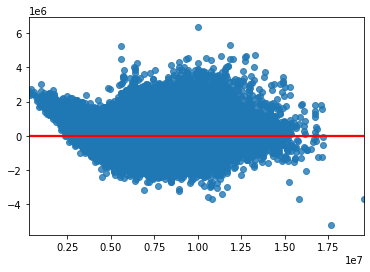

In [45]:
sns.regplot(x=y_pred, y=residuals,line_kws={'color':'red'})
plt.show()

In [46]:
import statsmodels.stats.api as sms
hetg = sms.het_goldfeldquandt(y=residuals, x=Xc)
hetg

(0.9823585298184324, 0.9497881583487219, 'increasing')

###### Autocorrealtion

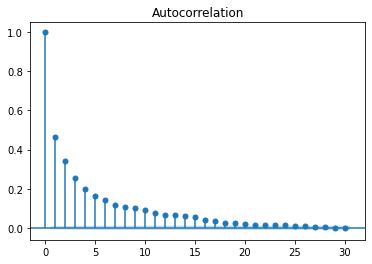

In [47]:
import statsmodels.tsa.api as smt
acf = smt.graphics.plot_acf(residuals, lags=30)
acf.show()

##### Checking for Linearity

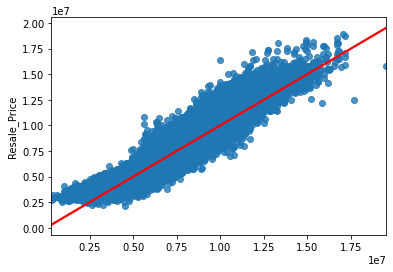

In [48]:
sns.regplot(x=y_pred, y=y,line_kws={'color':'red'})
plt.show()

In [49]:
import statsmodels.api as sm
sm.stats.diagnostic.linear_rainbow(model)

(0.9944212783856015, 0.6972871017778755)

#### Model Creation

#### Linear Regression

In [50]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [51]:
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,mean_squared_error,r2_score

In [52]:
lr.fit(X_train,y_train)
y_train_pred=lr.predict(X_train)

print('Train')
print('R2 Score:',r2_score(y_train,y_train_pred))
print('Mean Absolute Error',mean_absolute_error(y_train,y_train_pred))
print('Root Mean Squared Error',np.sqrt(mean_squared_error(y_train,y_train_pred)))
print('Mean Absolute Percentage Error',mean_absolute_percentage_error(y_train,y_train_pred))

y_test_pred=lr.predict(X_test)
print('\n\nTest')
print('R2 Score:',r2_score(y_test,y_test_pred))
print('Mean Absolute Error',mean_absolute_error(y_test,y_test_pred))
print('Root Mean Squared Error',np.sqrt(mean_squared_error(y_test,y_test_pred)))
print('Mean Absolute Percentage Error',mean_absolute_percentage_error(y_test,y_test_pred))

Train
R2 Score: 0.8652452244353114
Mean Absolute Error 648680.9548449233
Root Mean Squared Error 842564.2244633264
Mean Absolute Percentage Error 0.10323936780794514


Test
R2 Score: 0.8643853094510372
Mean Absolute Error 653287.1136119361
Root Mean Squared Error 848888.7552307398
Mean Absolute Percentage Error 0.10442223254143458


#### Random Forest Regressor

In [53]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()

In [54]:
rfr.fit(X_train,y_train)
y_train_pred=rfr.predict(X_train)

print('Train')
print('R2 Score:',r2_score(y_train,y_train_pred))
print('Mean Absolute Error',mean_absolute_error(y_train,y_train_pred))
print('Root Mean Squared Error',np.sqrt(mean_squared_error(y_train,y_train_pred)))
print('Mean Absolute Percentage Error',mean_absolute_percentage_error(y_train,y_train_pred))

y_test_pred=rfr.predict(X_test)
print('\n\nTest')
print('R2 Score:',r2_score(y_test,y_test_pred))
print('Mean Absolute Error',mean_absolute_error(y_test,y_test_pred))
print('Root Mean Squared Error',np.sqrt(mean_squared_error(y_test,y_test_pred)))
print('Mean Absolute Percentage Error',mean_absolute_percentage_error(y_test,y_test_pred))

Train
R2 Score: 0.991244814928286
Mean Absolute Error 148307.22689619788
Root Mean Squared Error 214765.04523459068
Mean Absolute Percentage Error 0.022234743811797325


Test
R2 Score: 0.9408978077914865
Mean Absolute Error 387455.12704343034
Root Mean Squared Error 560401.3942019487
Mean Absolute Percentage Error 0.058106690070048005


#### Hyperparameter Tuning

In [55]:
from sklearn.model_selection import RandomizedSearchCV

In [56]:
rfr_best = {'max_depth': 8,
 'max_features': 29,
 'min_samples_leaf': 4,
 'min_samples_split': 81,
 'n_estimators': 148}

In [57]:
rfr = RandomForestRegressor(**rfr_best)
rfr.fit(X_train,y_train)
y_train_pred=rfr.predict(X_train)

print('Train')
print('R2 Score:',r2_score(y_train,y_train_pred))
print('Mean Absolute Error',mean_absolute_error(y_train,y_train_pred))
print('Root Mean Squared Error',np.sqrt(mean_squared_error(y_train,y_train_pred)))
print('Mean Absolute Percentage Error',mean_absolute_percentage_error(y_train,y_train_pred))

y_test_pred=rfr.predict(X_test)
print('\n\nTest')
print('R2 Score:',r2_score(y_test,y_test_pred))
print('Mean Absolute Error',mean_absolute_error(y_test,y_test_pred))
print('Root Mean Squared Error',np.sqrt(mean_squared_error(y_test,y_test_pred)))
print('Mean Absolute Percentage Error',mean_absolute_percentage_error(y_test,y_test_pred))

Train
R2 Score: 0.7716222959343244
Mean Absolute Error 800947.2609869154
Root Mean Squared Error 1096876.6303491583
Mean Absolute Percentage Error 0.11974522608247512


Test
R2 Score: 0.7677729597727357
Mean Absolute Error 804752.3640104843
Root Mean Squared Error 1110845.8723548881
Mean Absolute Percentage Error 0.1200006934495298


#### KNN Regressor

In [58]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()

In [59]:
ss = StandardScaler()
X_train_ss = ss.fit_transform(X_train)
X_test_ss  = ss.transform(X_test)

In [60]:
knn.fit(X_train_ss,y_train)
y_train_pred=knn.predict(X_train_ss)

print('Train')
print('R2 Score:',r2_score(y_train,y_train_pred))
print('Mean Absolute Error',mean_absolute_error(y_train,y_train_pred))
print('Root Mean Squared Error',np.sqrt(mean_squared_error(y_train,y_train_pred)))
print('Mean Absolute Percentage Error',mean_absolute_percentage_error(y_train,y_train_pred))

y_test_pred=knn.predict(X_test_ss)
print('\n\nTest')
print('R2 Score:',r2_score(y_test,y_test_pred))
print('Mean Absolute Error',mean_absolute_error(y_test,y_test_pred))
print('Root Mean Squared Error',np.sqrt(mean_squared_error(y_test,y_test_pred)))
print('Mean Absolute Percentage Error',mean_absolute_percentage_error(y_test,y_test_pred))

Train
R2 Score: 0.9374312896036855
Mean Absolute Error 397632.02660865197
Root Mean Squared Error 574129.0662152972
Mean Absolute Percentage Error 0.059053404325003334


Test
R2 Score: 0.9009411387358836
Mean Absolute Error 498753.56306130416
Root Mean Squared Error 725511.1273534718
Mean Absolute Percentage Error 0.07380431978177072


#### Hyperparameter Tuning

In [61]:
from scipy.stats import randint as sp_randint

In [62]:
knn_best={'algorithm': 'auto', 'leaf_size': 13, 'n_neighbors': 19, 'weights': 'uniform'}

In [63]:
knn = KNeighborsRegressor(**knn_best)
knn.fit(X_train_ss,y_train)
y_train_pred=knn.predict(X_train_ss)

print('Train')
print('R2 Score:',r2_score(y_train,y_train_pred))
print('Mean Absolute Error',mean_absolute_error(y_train,y_train_pred))
print('Root Mean Squared Error',np.sqrt(mean_squared_error(y_train,y_train_pred)))
print('Mean Absolute Percentage Error',mean_absolute_percentage_error(y_train,y_train_pred))

y_test_pred=knn.predict(X_test_ss)
print('\n\nTest')
print('R2 Score:',r2_score(y_test,y_test_pred))
print('Mean Absolute Error',mean_absolute_error(y_test,y_test_pred))
print('Root Mean Squared Error',np.sqrt(mean_squared_error(y_test,y_test_pred)))
print('Mean Absolute Percentage Error',mean_absolute_percentage_error(y_test,y_test_pred))

Train
R2 Score: 0.8910187659248932
Mean Absolute Error 524667.0648569379
Root Mean Squared Error 757716.5847250855
Mean Absolute Percentage Error 0.07719875508456701


Test
R2 Score: 0.8778170271565234
Mean Absolute Error 552854.1456873344
Root Mean Squared Error 805754.5303147655
Mean Absolute Percentage Error 0.08091590652519265


#### SVR Regressor

In [64]:
from sklearn.svm import SVR

In [65]:
svr = SVR()
svr.fit(X_train_ss,y_train)
y_train_pred=svr.predict(X_train)

print('Train')
print('R2 Score:',r2_score(y_train,y_train_pred))
print('Mean Absolute Error',mean_absolute_error(y_train,y_train_pred))
print('Root Mean Squared Error',np.sqrt(mean_squared_error(y_train,y_train_pred)))
print('Mean Absolute Percentage Error',mean_absolute_percentage_error(y_train,y_train_pred))

y_test_pred=svr.predict(X_test_ss)
print('\n\nTest')
print('R2 Score:',r2_score(y_test,y_test_pred))
print('Mean Absolute Error',mean_absolute_error(y_test,y_test_pred))
print('Root Mean Squared Error',np.sqrt(mean_squared_error(y_test,y_test_pred)))
print('Mean Absolute Percentage Error',mean_absolute_percentage_error(y_test,y_test_pred))

Train
R2 Score: -0.03378198945493316
Mean Absolute Error 1727615.4091563018
Root Mean Squared Error 2333702.0794308777
Mean Absolute Percentage Error 0.26332825778166136


Test
R2 Score: -0.031588081780904
Mean Absolute Error 1731840.9227685842
Root Mean Squared Error 2341264.985231802
Mean Absolute Percentage Error 0.26467612990955347


#### XGBoost Regressor

In [66]:
from xgboost import XGBRegressor

In [67]:
xgbr = XGBRegressor()
xgbr.fit(X_train,y_train)
y_train_pred=xgbr.predict(X_train)

print('Train')
print('R2 Score:',r2_score(y_train,y_train_pred))
print('Mean Absolute Error',mean_absolute_error(y_train,y_train_pred))
print('Root Mean Squared Error',np.sqrt(mean_squared_error(y_train,y_train_pred)))
print('Mean Absolute Percentage Error',mean_absolute_percentage_error(y_train,y_train_pred))

y_test_pred=xgbr.predict(X_test)
print('\n\nTest')
print('R2 Score:',r2_score(y_test,y_test_pred))
print('Mean Absolute Error',mean_absolute_error(y_test,y_test_pred))
print('Root Mean Squared Error',np.sqrt(mean_squared_error(y_test,y_test_pred)))
print('Mean Absolute Percentage Error',mean_absolute_percentage_error(y_test,y_test_pred))

Train
R2 Score: 0.9448866273781735
Mean Absolute Error 379552.20848150784
Root Mean Squared Error 538839.5024608596
Mean Absolute Percentage Error 0.0572855231304479


Test
R2 Score: 0.9336490718999045
Mean Absolute Error 413780.6439867239
Root Mean Squared Error 593773.6393366517
Mean Absolute Percentage Error 0.061796330953399405


#### Hyperparameter Tuning

In [68]:
from scipy.stats import uniform as sp_uniform

In [69]:
xgbr_best = {'colsample_bytree': 0.0925153162538326,
 'learning_rate': 0.08703064764855174,
 'max_depth': 3,
 'min_child_weight': 2,
 'n_estimators': 290}

In [70]:
xgbr = XGBRegressor(**xgbr_best)
xgbr.fit(X_train,y_train)
y_train_pred=xgbr.predict(X_train)

print('Train')
print('R2 Score:',r2_score(y_train,y_train_pred))
print('Mean Absolute Error',mean_absolute_error(y_train,y_train_pred))
print('Root Mean Squared Error',np.sqrt(mean_squared_error(y_train,y_train_pred)))
print('Mean Absolute Percentage Error',mean_absolute_percentage_error(y_train,y_train_pred))

y_test_pred=xgbr.predict(X_test)
print('\n\nTest')
print('R2 Score:',r2_score(y_test,y_test_pred))
print('Mean Absolute Error',mean_absolute_error(y_test,y_test_pred))
print('Root Mean Squared Error',np.sqrt(mean_squared_error(y_test,y_test_pred)))
print('Mean Absolute Percentage Error',mean_absolute_percentage_error(y_test,y_test_pred))

Train
R2 Score: 0.8638513045651822
Mean Absolute Error 615723.830228642
Root Mean Squared Error 846910.806651738
Mean Absolute Percentage Error 0.09205504319287841


Test
R2 Score: 0.8628606222684254
Mean Absolute Error 618041.6733331706
Root Mean Squared Error 853647.355682491
Mean Absolute Percentage Error 0.09219821717652979


### Predicting Test Data

In [71]:
dum_test.head()

,Floor_Area,Resale_Price,Age_Left_Days,Year,Month,City_city_10,City_city_11,City_city_12,City_city_13,City_city_14,...,Apartment_Class_Royal Duplex,Apartment_Class_Royal Flat,Apartment_Class_Royal Flat Loft,Apartment_Class_Standard,Apartment_Type_2 BHK,Apartment_Type_3 BHK,Apartment_Type_4 BHK,Apartment_Type_5 BHK,Apartment_Type_CLASSY,Apartment_Type_PREMIUM
68292,484.0,0.0,23390.43,2021,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
68293,484.0,0.0,23390.43,2021,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
68294,786.0,0.0,19831.72,2021,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
68295,721.0,0.0,20470.43,2021,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
68296,721.0,0.0,20440.00,2021,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [72]:
dum_test.drop('Resale_Price',axis=1,inplace=True)

In [73]:
xgbr = XGBRegressor()
xgbr.fit(X,y)

pred_val = xgbr.predict(dum_test)

In [74]:
pred_val=pd.DataFrame(pred_val,columns=["Predicted_Resale_Price"])

In [75]:
pred_val

,Predicted_Resale_Price
0,3276609.50
1,2995942.25
2,4303717.50
3,4117575.75
4,4186461.75
...,...
7104,8358606.50
7105,9005487.00
7106,8292597.00
7107,8358606.50


In [76]:
test.drop('Resale_Price',axis=1,inplace=True)

In [77]:
test["Predicted_Resale_Price"]=pred_val['Predicted_Resale_Price'].values

In [78]:
test.head()

,Date,City,Locality,Sublocality,Floor,Floor_Area,Apartment_Class,Apartment_Type,Age_Left,Predicted_Resale_Price
68292,2021-01,city_1,locality_004,170,07 TO 09,484.0,Enhanced,2 BHK,64 years 01 month,3276609.50
68293,2021-01,city_1,locality_004,170,01 TO 03,484.0,Enhanced,2 BHK,64 years 01 month,2995942.25
68294,2021-01,city_1,locality_001,216,04 TO 06,786.0,New Gen,3 BHK,54 years 04 months,4303717.50
68295,2021-01,city_1,locality_001,223,07 TO 09,721.0,New Gen,3 BHK,56 years 01 month,4117575.75
68296,2021-01,city_1,locality_001,223,10 TO 12,721.0,New Gen,3 BHK,56 years,4186461.75


In [79]:
test.to_csv("2021_Pred_Price.csv",index=False)

In [80]:
import joblib
joblib.dump(xgbr,'xgbr.joblib')

['xgbr.joblib']

In [81]:
df.head()

,City,Floor,Floor_Area,Apartment_Class,Apartment_Type,Resale_Price,Age_Left_Days,Year,Month
0,city_1,10 TO 12,474.0,Enhanced,2 BHK,3483000.0,22386.72,2017,1
1,city_1,01 TO 03,721.0,New Gen,3 BHK,3754000.0,22113.01,2017,1
2,city_1,01 TO 03,721.0,New Gen,3 BHK,3934000.0,22782.15,2017,1
3,city_1,04 TO 06,732.0,New Gen,3 BHK,3979000.0,22660.43,2017,1
4,city_1,01 TO 03,721.0,New Gen,3 BHK,3979000.0,22782.15,2017,1
